# CA1 - Artificial Intelligence

1	A puzzle has multiple ways of reaching the end solution. Fig. 1 shows a graph that represents all possible routes to the solution. The starting point of the game is represented by A, the solution is represented by S. The other points in the graph are possible intermediary stages. 

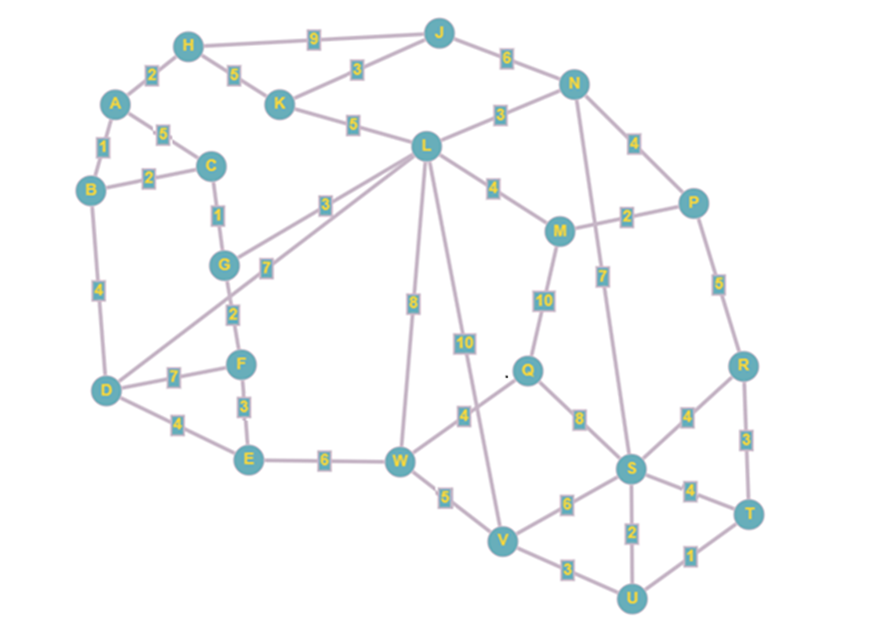

(i)	Identify the differences between a graph and a tree. [0-5] 

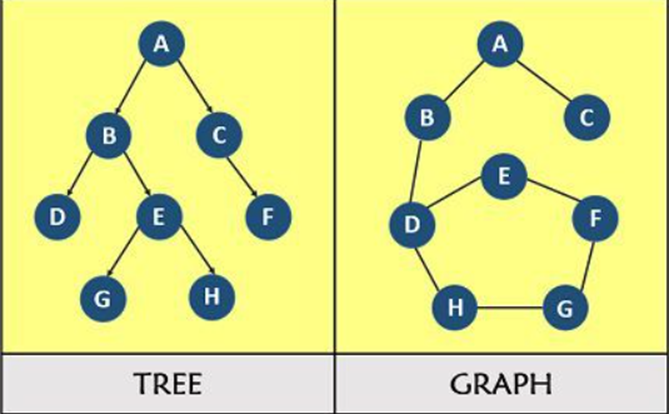

Tree 

•	Only one path exists between two vertices (nodes).
Trees always will start from the top to the bottom. This means that in order to reach the bottom of the tree there is just one path. If you look at the image above, there is only one path to go from A to G or H.

•	Tree doesn´t have loops.
Following the same approach of the example above, because of the root concept used on Trees as the connections between the vertices are always pointing down, once the next stage(node) is chosen, you can´t go back.

•	Number of edges is “n – 1” (n = nodes).
Each node on the Tree has only one connection with the next node. By saying that, the numbers of edges will always be the numbers of nodes minus 1 (n-1)


Graph

•	More than one path is allowed between two vertices.
Graphs allow you to go to H or G in many different ways and directions. Moreover, it is not mandatory starting from A. Graph does not have a concept of a root. 

•	There can be loop in graphs.
In order to find the better(cheaper) path from one point to other, graphs are allowed to have loops and move back to the top or sides. A good example using the image above is: Starting from A and finishing on G, the chosen path could be A,B,D,H,G or A,B,D,E,F,G. The result will be chosen based on the value of the distance between each node.

•	Number of edges are not defined.
Using the opposite concept of Tree, Graphs can (and will most of the times) have one node connected to more the one node. In the image above, node D is connected to B, E and H.


(ii)	Explain in detail how the graph is an abstraction of the problem. [0-5]

The concept of graph abstraction originated in the 18th century with graph theory. It all began when a tourist aimed to traverse all seven bridges in the city of Königsberg (now Kaliningrad, Russia) without retracing any steps. Ultimately, it was determined to be impossible because each landmass (nodes or vertices) connected by the seven bridges had an odd number of bridges (edges) linked to them. This led to the conclusion that, for a solution to exist, the graph must either have zero or two vertices with an odd degree (an odd number of edges connected to them).
Over the years, problem-solving methodologies evolved, shifting from mere measurement or calculation to identifying relationships between objects. In this context, graph theory proved valuable not only from a mathematical perspective but also in addressing real-life problems. It found applications in diverse fields such as biology, linguistics, and social science.

(iii)	Identify the advantages of using a visualisation such as the one shown in Fig. 1. [0-5]

Interactions between various graph parts may be represented in an easy-to-understand way through the use of visualizations. It helps users in recognizing the relationships and structures between various stages.
The graphical representation makes possible to quickly examine several routes and paths that go from the beginning point (A) to the solution (S). This is very helpful when assessing how effective or ideal certain techniques are.
The graph allows an easy observation and comparison of alternate routes when there are several ways to arrive at the solution. It also makes it possible to explore different outputs with other combinations or techniques.


(b)	Demonstrate how Dijkstra’s algorithm would find the shortest path to the solution in Fig.1 through diagrams and written explanation of each stage. [0-25]

In [5]:
example_graph = {
    'A': {'B': 1, 'C': 5, 'H': 2},
    'B': {'A': 1, 'C': 2, 'D': 4},
    'C': {'A': 5, 'B': 2, 'G': 1},
    'D': {'B': 4, 'L' : 7, 'F': 7, 'E': 4},
    'E': {'D': 4, 'F': 3, 'W': 6},
    'F': {'D': 7, 'E': 3, 'G' : 2},
    'G': {'F': 2, 'C': 1, 'L' : 3},
    'H': {'A': 2, 'K':5, 'J': 9},
    'J': {'H': 9, 'K': 3, 'N': 6},
    'K': {'H': 5, 'J': 3, 'L': 5},
    'L': {'K': 5, 'N': 3, 'G': 3, 'D': 7, 'W': 8, 'V': 10,'M': 4},
    'M': {'L': 4, 'Q': 10, 'P': 2},
    'N': {'J': 6, 'L': 3, 'S': 7, 'P': 4},
    'P': {'N': 4, 'M': 2, 'R': 5},
    'Q': {'M': 10, 'W': 4, 'S': 8},
    'R': {'P': 5, 'S': 4, 'T': 3},
    'S': {'N': 7, 'Q': 8, 'R': 4, 'V': 6, 'U': 2, 'T': 4},
    'T': {'R': 3, 'S': 4, 'U': 1},
    'U': {'T': 1, 'S': 2, 'V': 3},
    'V': {'U': 3, 'S': 6, 'L': 10, 'W': 5},
    'W': {'E': 6, 'L': 8, 'Q': 4, 'V': 5},
    
    
}

In [6]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt


def calculate_distances(graph, starting_vertex, ending_vertex):
    distances = {vertex: float('infinity') for vertex in graph}
    distances[starting_vertex] = 0
    predecessors = {vertex: None for vertex in graph}

    pq = [(0, starting_vertex)]
    while len(pq) > 0:
        current_distance, current_vertex = heapq.heappop(pq)

        # Nodes can get added to the priority queue multiple times. We only
        # process a vertex the first time we remove it from the priority queue.
        if current_distance > distances[current_vertex]:
            continue

        # If the current vertex is the ending vertex, break out of the loop
        if current_vertex == ending_vertex:
            break

        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight

            # Only consider this new path if it's better than any path we've
            # already found.
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                predecessors[neighbor] = current_vertex  # This line was added from the original code to Track the predecessor
                heapq.heappush(pq, (distance, neighbor))

In [ ]:
    # Reconstruct the path from A to S
    path = []
    current_node = ending_vertex
    while current_node is not None:
        path.insert(0, current_node)
        current_node = predecessors[current_node]

    return distances, path

In [7]:
starting_vertex = 'A'
ending_vertex = 'S'

distances, path = calculate_distances(example_graph, starting_vertex, ending_vertex)

In [14]:
#This function gets the value of each path chosen in order to reach the ending_vertex
for i, node in enumerate(path[:-1]):
    next_node = path[i + 1]
    edge_weight = example_graph[node][next_node]
    print(f"Step {i + 1}: Move from {node} to {next_node} with edge weight {edge_weight}")

# Print the total distance and the final path
print(f"\nTotal distance from {starting_vertex} to {ending_vertex}: {distances[ending_vertex]}")
print(f"Shortest path: {' -> '.join(path)}")

Step 1: Move from A to B with edge weight 1
Step 2: Move from B to C with edge weight 2
Step 3: Move from C to G with edge weight 1
Step 4: Move from G to L with edge weight 3
Step 5: Move from L to N with edge weight 3
Step 6: Move from N to S with edge weight 7

Total distance from A to S: 17
Shortest path: A -> B -> C -> G -> L -> N -> S


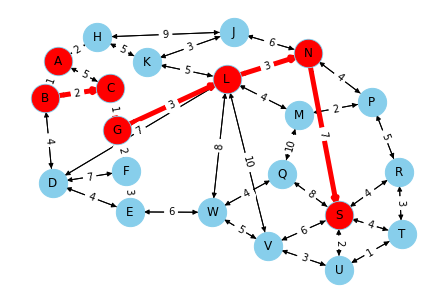

In [13]:
node_positions = {
    'A': (89, -101),
    'B': (66, -182),
    'C': (179, -160),
    'D': (80,-371),
    'E': (213, -436),
    'F': (207, -345),
    'G': (191, -253),
    'H': (157, -47),
    'J': (392, -35),
    'K': (242, -103),
    'L': (380, -140),
    'M': (505, -221),
    'N': (520, -83),
    'P': (630, -191),
    'Q': (476, -351),
    'R': (677, -347),
    'S': (573, -443),
    'T': (682, -486),
    'U': (574, -565),
    'V': (452, -512),
    'W': (355, -437),
}
G = nx.DiGraph()
G.add_nodes_from(node_positions.keys())
for node, neighbors in example_graph.items():
    G.add_edges_from((node, neighbor, {'weight': weight}) for neighbor, weight in neighbors.items())

# Draw the graph with specified positions
nx.draw(G, pos=node_positions, with_labels=True, node_size=800, node_color="skyblue", font_size=12)

# Highlight the chosen path
path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
nx.draw_networkx_nodes(G, pos=node_positions, nodelist=path, node_color="red", node_size=700)
nx.draw_networkx_edges(G, pos=node_positions, edgelist=path_edges, edge_color="red", width=5)

# Display the edge labels
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=node_positions, edge_labels=labels)

plt.show()